In [15]:
# Импортируем необходимые библиотеки

import os
from os import path
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Импорт данных

In [4]:
# загружаем данные в переменную, содержащую объект библиотеки Pandas - Dataframe
data = pd.read_csv('data/Annual changes in global temperature 18801985.csv')
# устанавливаем индекс для временного ряда и сортируем по нему выборку
data.set_index('x').sort_index()

,Unnamed: 0
x,
-0.72,5
-0.54,6
-0.54,8
-0.49,14
-0.49,25
...,...
0.19,59
0.20,74
0.27,101


In [5]:
data.head()

,Unnamed: 0,x
0,1,-0.40
1,2,-0.37
2,3,-0.43
3,4,-0.47
4,5,-0.72


In [6]:
data.describe()

,Unnamed: 0,x
count,106.000000,106.000000
mean,53.500000,-0.120566
std,30.743563,0.217767
min,1.000000,-0.720000
25%,27.250000,-0.277500
50%,53.500000,-0.090000
75%,79.750000,0.040000
max,106.000000,0.420000


Графическое представление и описание поведения временного ряда

In [7]:
def plot_assignation(axp, data, xlabel, ylabel, title1):
    axp.plot(data)
    axp.set_xlabel(xlabel)
    axp.set_ylabel(ylabel)
    axp.set_title(title1 )

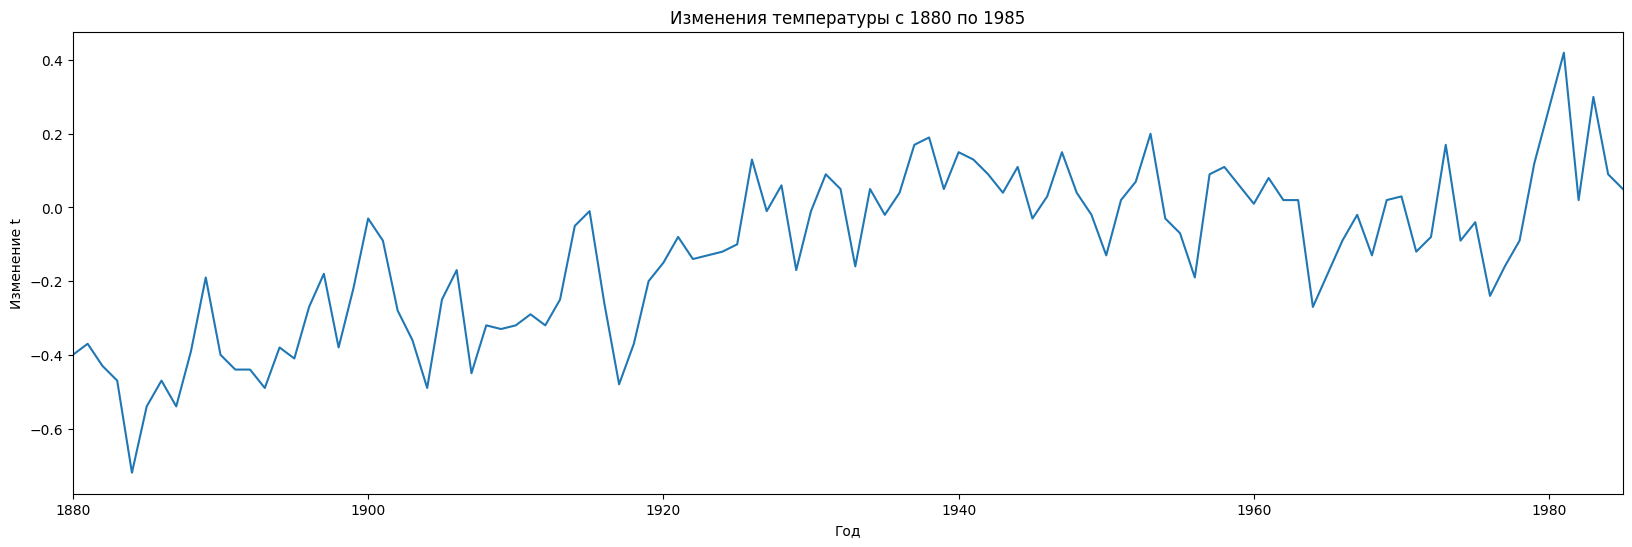

In [27]:
time_axis = np.linspace(1880, 1985, len(data["x"])) 
plt.figure(figsize=(20, 6)) 
plt.plot(time_axis, data["x"])

# заголовки
plt.title('Изменения температуры с 1880 по 1985')
plt.xlabel('Год')
plt.ylabel('Изменение t')

# команда на отрисовку
plt.xlim(1880, 1985)
plt.show()

Выделение закономерных (неслучайных) составляющих временного ряда

Разложения ряда на компоненты

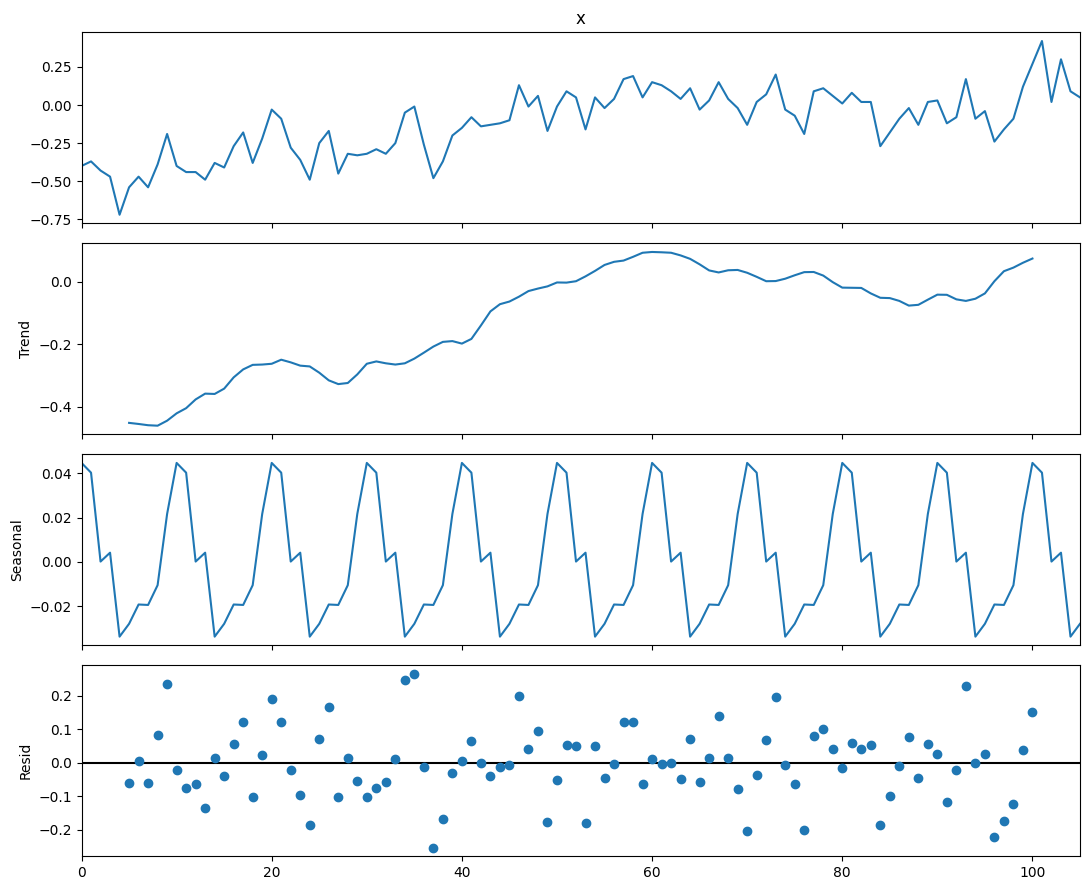

In [28]:
# импортируем функцию seasonal_decompose из statsmodels
# (то есть осуществляем декомпозицию сигнала/временного ряда)
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


decompose = seasonal_decompose(data["x"], period=10)
decompose.plot()
plt.show()

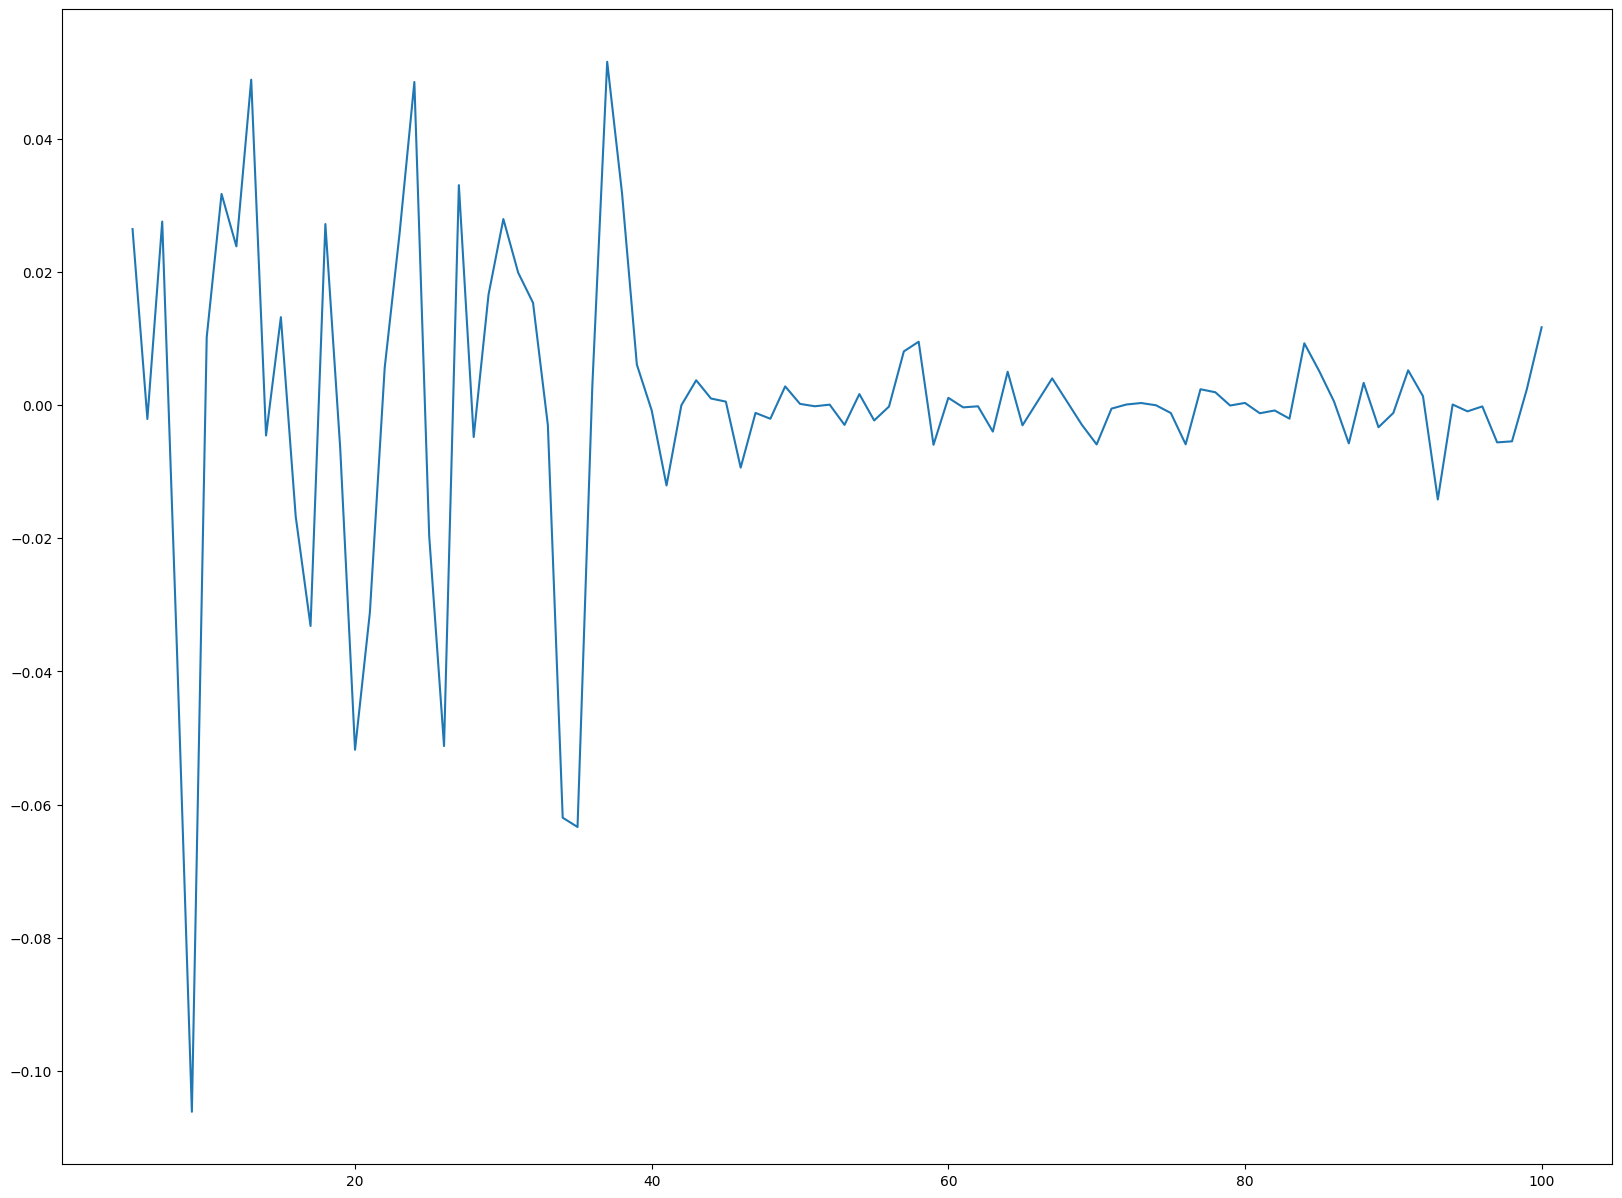

In [29]:
new_ps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))
 
plt.plot(new_ps)
plt.show()

<Axes: >

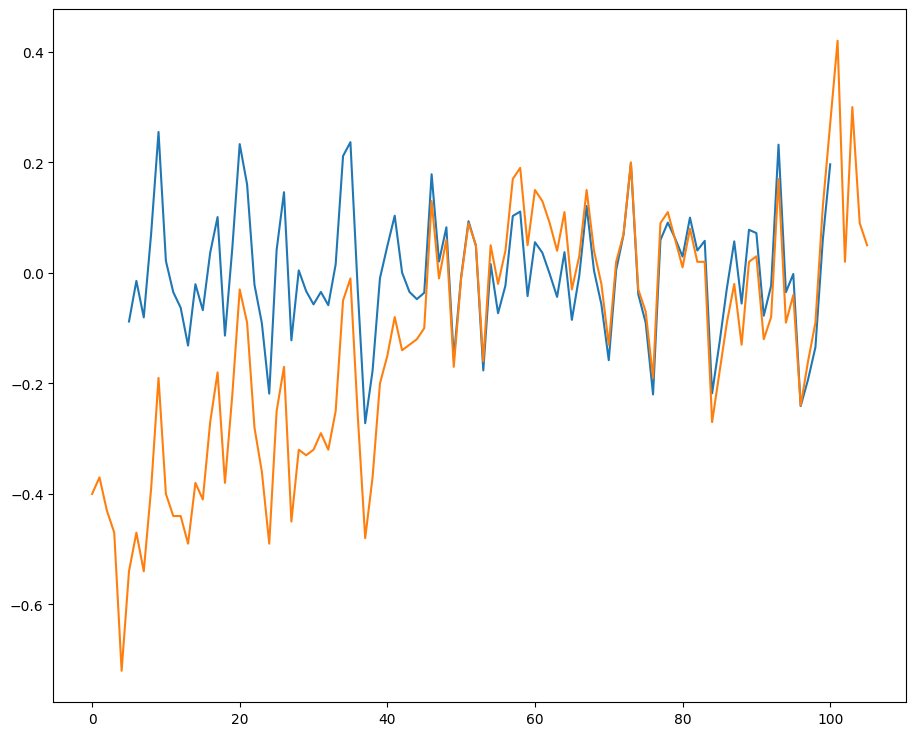

In [30]:
# удаляем компонент тренда из временного ряда...
passengers_r = data["x"] - decompose.trend
# ...и отрисовываем обработанный и исходный ряды
passengers_r.plot()
data["x"].plot()

Стационарный процесс

In [32]:
# импортируем функцию, описывающую тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

In [33]:
# всю теорию, описанную выше, реализуем с помощью statsmodels для проверки
# временного ряда перевозок на стационарность

alpha = 0.05
name = "Изменения температуры"
ts = data["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Изменения температуры :
Test Statistic                 -1.909132
p-value                         0.327778
#Lags Used                      7.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


Тренд

/tmp/ipykernel_5433/1110318620.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


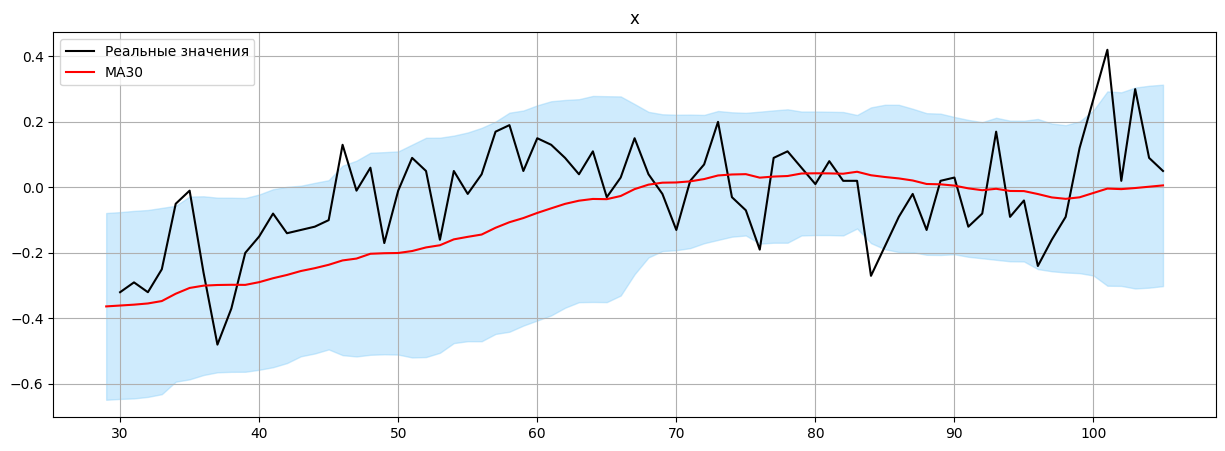

In [34]:
# указываем размер окна
window = 30

# вычисляем скользящее среднее и стандартное отклонение
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

# отрисовываем скользящее среднее
plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")

# отрисовываем верхний и нижний интервалы
lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')
# показываем сетку на графике
plt.grid(True)
plt.show()

Сезонность

Автокорреляция и коррелограмма

In [35]:
import statsmodels.tsa.api as smt

<Figure size 1200x700 with 0 Axes>

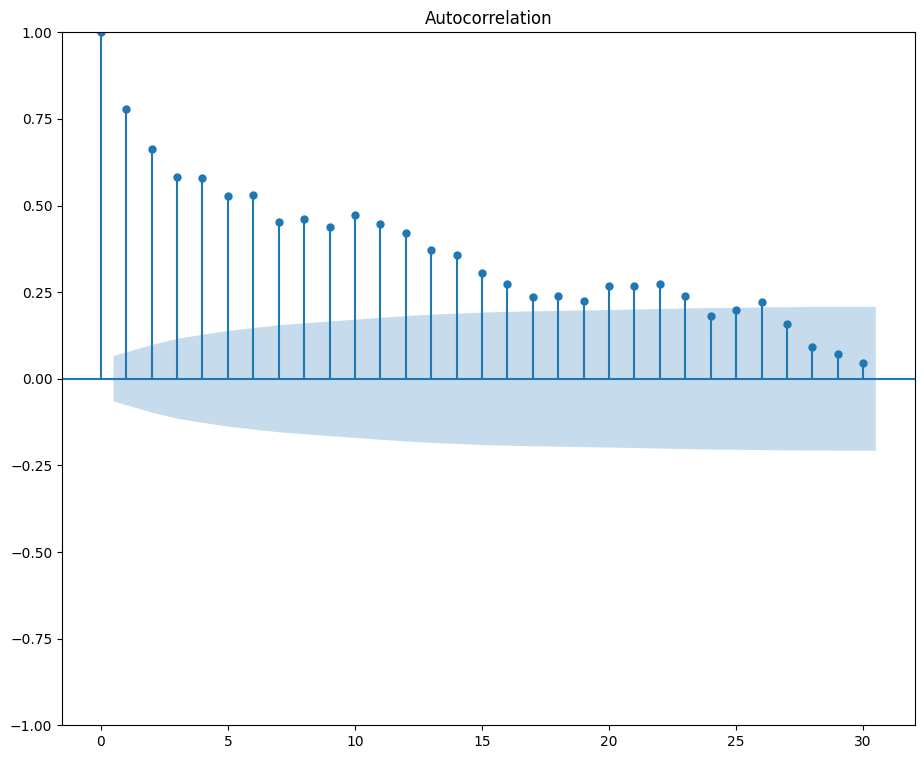

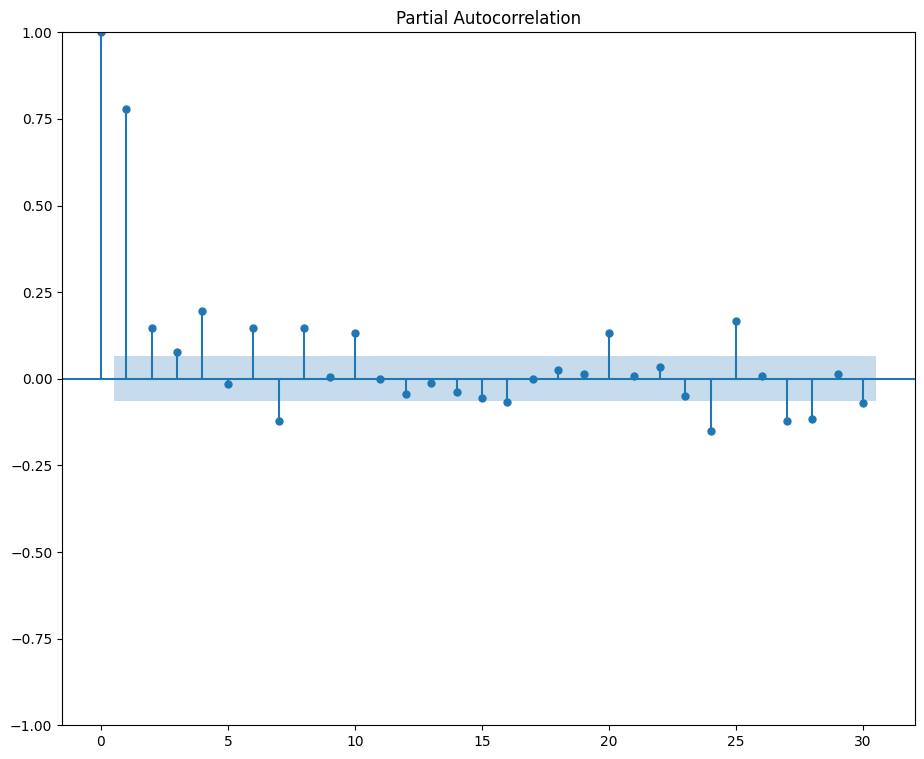

In [36]:
ts = data["x"]


fig = plt.figure(figsize=(12, 7))
# рисуем автокорреляционную функцию
# 
# изображение отрисовывается с запаздываниями по горизонтали и корреляциями по
# вертикали
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)

# есть также функция отрисовки частичной автокорреляции
pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

# Частичная автокорреляция (Partial Autocorrelation) — это краткая
# характеристика взаимосвязи между наблюдением во временном ряду и наблюдениями
# на предыдущем отрезке времени, когда влияние малой задержки устранено.
# Автокорреляция состоит как из прямой, так и из косвенной корреляции.

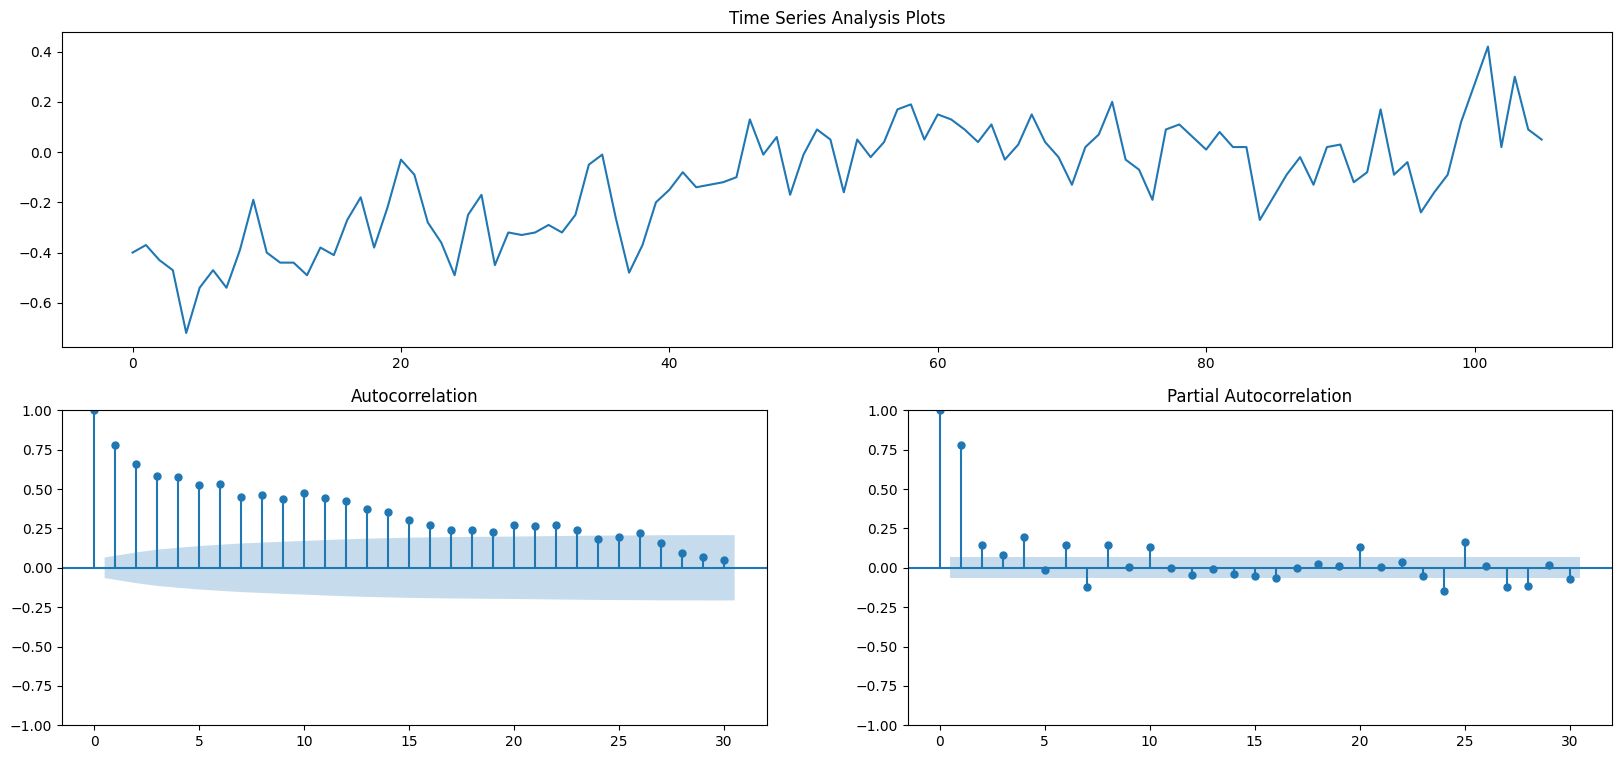

In [37]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None